# Zbadanie możliwości
Api wykop w celu pobrania wpisów i komentarzy z danego wątku w celu wykrycia aktualnych trendów i głównych tematów, mam zamiar dać użytkownikowi możliwość wyboru tagów i sprawdzenia jakie są trendy w nich aktualnie coś ala mechanizm twittera

In [27]:
import numpy as np
import pandas as pd
import networkx as nx
from wykop import WykopAPI
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import time
import spacy
import io
import base64
from PIL import Image
import handy_functions as hf

# Użycie wordClouda

In [2]:
wpisy = hf.get_posts_and_comments("afryka", 1)

2025-01-25 12:27:06.415 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/afryka/stream?page=1&limit=25&sort=all&type=entry&multimedia=false'
2025-01-25 12:27:08.040 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79809133/comments?page=1&limit=25
2025-01-25 12:27:08.108 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79809133/comments?page=2&limit=25
2025-01-25 12:27:09.154 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79796671/comments?page=1&limit=25
2025-01-25 12:27:09.243 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79796671/comments?page=2&limit=25
2025-01-25 12:27:10.294 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79782269/comments?page=1&limit=25
2025-01-25 12:27:10.366 | DEBUG    | wy

In [5]:
[wpis[2] for wpis in wpisy]

['#polityka #bekazlewactwa #bekazprawakow #afryka \nZabawni są lewacy którzy cieszą się z upadku apartheidu w RPA...mimo, że ten upadek był na rękę jedynie oligarchii (i rosji)\nKiedyś w RPA kilkanaście % społeczeństwa miało większość majątku i była biedota. Były 3 warstwy spoleczne czyli oligarchia, klasa srednia i bieda.\nCzemu oligarchowie tak zabiegali żeby aparthaid upadł??? Bo 1 ruchem ręki wyeliminowali klasę średnia. Aktualnie są 2 warstwy społeczne czyli oligarchia z 1-2% i biedota.\n\nA co w tym najzabawniejsze? To, ze gdyby w Polsce wprowadzić korwinizmy mielibyśmy to samo. Nagle powstałyby oligopole bo ludzie z dużymi majątkami mieliby ultra wolny rynek i wykosiliby konkurencję. \nCzyli lewacy w Polsce cieszą się, ze w RPA powstał system którego chcą korwinisci w Polsce (tylko innymi metodami)\n\nW 1993 roku w RPA według indexu Giniego były mniejsze nierówności (mimo, że i tak wielkie) niż dziś XD\nCzyli dziś jest tam raj wolnościowców.\n\nA teraz w 2024 odbyły się wybory w

# Użycie wordcloud

In [14]:
# Prosta ta tablica słów
text = ""
for a in wpisy:
    try:
        text += " " + a[2]
    except:
        continue
text = text.replace("\n", " ")
text

' #polityka #bekazlewactwa #bekazprawakow #afryka  Zabawni są lewacy którzy cieszą się z upadku apartheidu w RPA...mimo, że ten upadek był na rękę jedynie oligarchii (i rosji) Kiedyś w RPA kilkanaście % społeczeństwa miało większość majątku i była biedota. Były 3 warstwy spoleczne czyli oligarchia, klasa srednia i bieda. Czemu oligarchowie tak zabiegali żeby aparthaid upadł??? Bo 1 ruchem ręki wyeliminowali klasę średnia. Aktualnie są 2 warstwy społeczne czyli oligarchia z 1-2% i biedota.  A co w tym najzabawniejsze? To, ze gdyby w Polsce wprowadzić korwinizmy mielibyśmy to samo. Nagle powstałyby oligopole bo ludzie z dużymi majątkami mieliby ultra wolny rynek i wykosiliby konkurencję.  Czyli lewacy w Polsce cieszą się, ze w RPA powstał system którego chcą korwinisci w Polsce (tylko innymi metodami)  W 1993 roku w RPA według indexu Giniego były mniejsze nierówności (mimo, że i tak wielkie) niż dziś XD Czyli dziś jest tam raj wolnościowców.  A teraz w 2024 odbyły się wybory w których pi

In [15]:
nlp = spacy.load("pl_core_news_lg")

doc = nlp(text)

cleaned_tokens = [ token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ not in ["VERB", "AUX", "PRON"] ]

cleaned_text = " ".join(cleaned_tokens)
cleaned_text

'  polityka bekazlewactwo bekazprawakow afryka   zabawni lewak upadek apartheid rpa upadek ręka oligarchia rosja kiedyś rpa kilkanaście społeczeństwo większość majątek biedota 3 warstwa spoleczny oligarchia klasa srednie bieda oligarcha aparthaid 1 ruch ręka klasa średni aktualnie 2 warstwa społeczny oligarchia 1 2 biedota   zabawny polska korwinizmy sam nagle oligopole człowiek duży majątk ultra wolny rynek wykosić by konkurencja   lewak polska rpa system polska inny metoda   1993 rpa indexu gini mały nierówność wielki xd raj wolnościowiec   2024 wybory pierwszy 1994 anc samodzielnie wspolrzadzić da partia biały antyrasisci niezły mindfuck da tyle samo czarny bialy ilościowo oczywiście czarny logiczny dodatkowo anc koalicja partia vf+ poparcie cały 2 spadkobierca aparthaidzie przewodniczacy taki mikro partia minister więziennictwo xd dodatkowo da złożyć biały rosja współpraca zachod zabawny lewica polska ogarniać temat rpa anc turbo pro rosyjski działanie turbo pro oligarchiczny   ps 

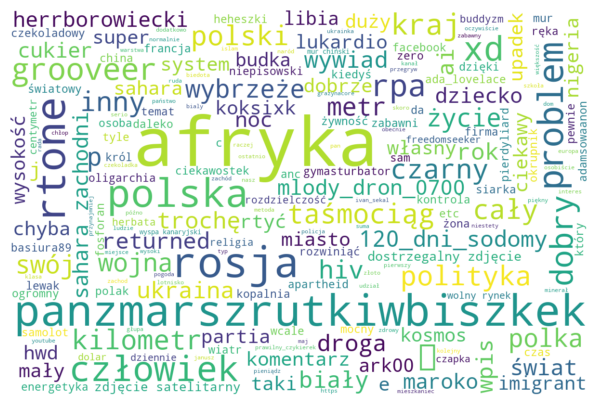

In [16]:
wordcloud = WordCloud(width=1200, height=800, background_color='white').generate(cleaned_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Użycie LDA

In [28]:
from gensim import corpora
from gensim.models import LdaModel
import re 

tag = "nieruchomosci"
pages = 5
wpisy = hf.get_posts_and_comments(tag, pages)

# Funkcja do czyszczenia i tokenizacji tekstu
def preprocess(text):
    text = re.sub(r'@\w+', '', text)
    
    text = re.sub(r':[()\w]+:', '', text)
    
    emoticons = [
        r'\( ͡° ͜ʖ ͡°\)', r'\( ͡° ʖ̯ ͡°\)', r'\( ͡º ͜ʖ͡º\)', r'\( ͡°\( ͡° ͜ʖ\( ͡° ͜ʖ ͡°\)ʖ ͡°\) ͡°\)',
        r'\(╥﹏╥\)', r'\(╯︵╰,\)', r'\(ʘ‿ʘ\)', r'\( ͡° ᴥ ͡°\)', r'\(｡◕‿‿◕｡\)',
        r'ᕙ\(⇀‸↼‶\)ᕗ', r'ᕦ\(òóˇ\)ᕤ', r'ᶘᵒᴥᵒᶅ', r'づ•﹏•)づ']
    for emoticon in emoticons:
        escaped_emoticon = re.escape(emoticon)
        text = re.sub(escaped_emoticon, '', text)
    
    doc = nlp(text)
    tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop 
        and not token.is_punct  
        and token.pos_ not in ["VERB", "AUX", "PRON"]  
        and not re.match(r'^\d+$', token.text)  
        and not re.match(r'^[a-zA-Z]$', token.text) 
        and not re.match(r'^\W+$', token.text)  
    ]
    
    return tokens  

processed_posts = []
for post in wpisy:
    processed_posts.append(preprocess(post[2]))

2025-01-25 19:38:05.580 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/tags/nieruchomosci/stream?page=1&limit=25&sort=all&type=entry&multimedia=false'
2025-01-25 19:38:06.937 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79917613/comments?page=1&limit=25
2025-01-25 19:38:06.982 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79917613/comments?page=2&limit=25
2025-01-25 19:38:08.025 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79917423/comments?page=1&limit=25
2025-01-25 19:38:08.085 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79917423/comments?page=2&limit=25
2025-01-25 19:38:09.129 | DEBUG    | wykop.wykop_api:make_request:64 - Making request to https://wykop.pl/api/v3/entries/79917309/comments?page=1&limit=25
2025-01-25 19:38:10.159 | DEBUG 

NameError: name 'nlp' is not defined

In [62]:
processed_posts

[['nieruchomosci'],
 ['stopa',
  'spadny',
  'pewno',
  '͜ʖ',
  'https://www.adradar.pl/szczegoly_oferty?grupa=14054769&search%5blocations%5d%5b0%5d=55119&ap19=xe6qn0pcc3',
  'nieruchomosci'],
 ['mieszkanie',
  'deweloper',
  'szybki',
  'flip',
  'nieruchomość',
  'pewniak',
  'okazja',
  'facebooku',
  'deweloper',
  'idealny',
  'inwestycja',
  'ostatni',
  'sztuka',
  'świeży',
  'bułeczek',
  'bułeczki',
  'raz',
  'umowa',
  'rezerwacyjny',
  'minuta',
  'sprzed',
  'nos',
  'deweloper',
  'cud',
  'widok',
  'park',
  'blisko',
  'centrum',
  'minuta',
  'komunikacja',
  'miejski',
  'potem',
  'minuta',
  'sprint',
  'usain',
  'bolta',
  'pas',
  'ruch',
  'cena',
  'umowa',
  'netto',
  'inwestycja',
  'dobry',
  'vat',
  'grosz',
  'potem',
  'cena',
  'obowiązkowy',
  'zakup',
  'miejsce',
  'postojowy',
  'samochód',
  'pusty',
  'przestrzeń',
  'tysiąc',
  'komórka',
  'lokatorski',
  'cena',
  'komórka',
  'iphone',
  'trochę',
  'duży',
  'opłata',
  'ogrodzenie',
  'os

In [63]:
dictionary = corpora.Dictionary(processed_posts)
dictionary

In [64]:
# Tworzenie słownika i korpusu
corpus = [dictionary.doc2bow(post) for post in processed_posts]

# Trenowanie modelu LDA
num_topics = 2  # Liczba tematów do wykrycia
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Wyświetlenie tematów
for idx, topic in lda_model.print_topics(-1):
    print(f"Temat {idx}: {topic}")

Temat 0: 0.011*"cena" + 0.010*"dom" + 0.008*"mieszkanie" + 0.008*"͜ʖ" + 0.005*"rok" + 0.004*"człowiek" + 0.004*"blok" + 0.004*"działka" + 0.004*"miejsce" + 0.004*"polska"
Temat 1: 0.022*"mieszkanie" + 0.019*"deweloper" + 0.012*"xd" + 0.008*"rok" + 0.007*"nieruchomosci" + 0.007*"człowiek" + 0.006*"cena" + 0.005*"op" + 0.005*"wada" + 0.005*"fliper"


In [65]:
# wizualizacja
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Przygotowanie wizualizacji
vis = gensimvis.prepare(lda_model, corpus, dictionary)

# Wyświetlenie
pyLDAvis.display(vis)